In [1]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,transcript,full_name
bushh,"Mr. Chief Justice, Mr. President, Vice Preside...",George H. Bush
bushw1,"President Clinton, distinguished guests and my...",George W. Bush
bushw2,"Vice President Cheney, Mr. Chief Justice, Pres...",George W. Bush2
carter,"For myself and for our Nation, I want to thank...",Jimmy Carter
clinton1,"My fellow citizens, today we celebrate the mys...",Bill Clinton
clinton2,"My fellow citizens, at this last Presidential ...",Bill Clinton2
nixon1,"Senator Dirksen, Mr. Chief Justice, Mr. Vice P...",Richard Nixon
nixon2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",Richard Nixon2
obama1,I stand here today humbled by the task before ...,Barack Obama
obama2,"\r\nVice President Biden, Mr. Chief Justice,\r...",Barack Obama2


In [2]:
# Create quick lambda functions to find the polarity and subjectivity of each speech
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)

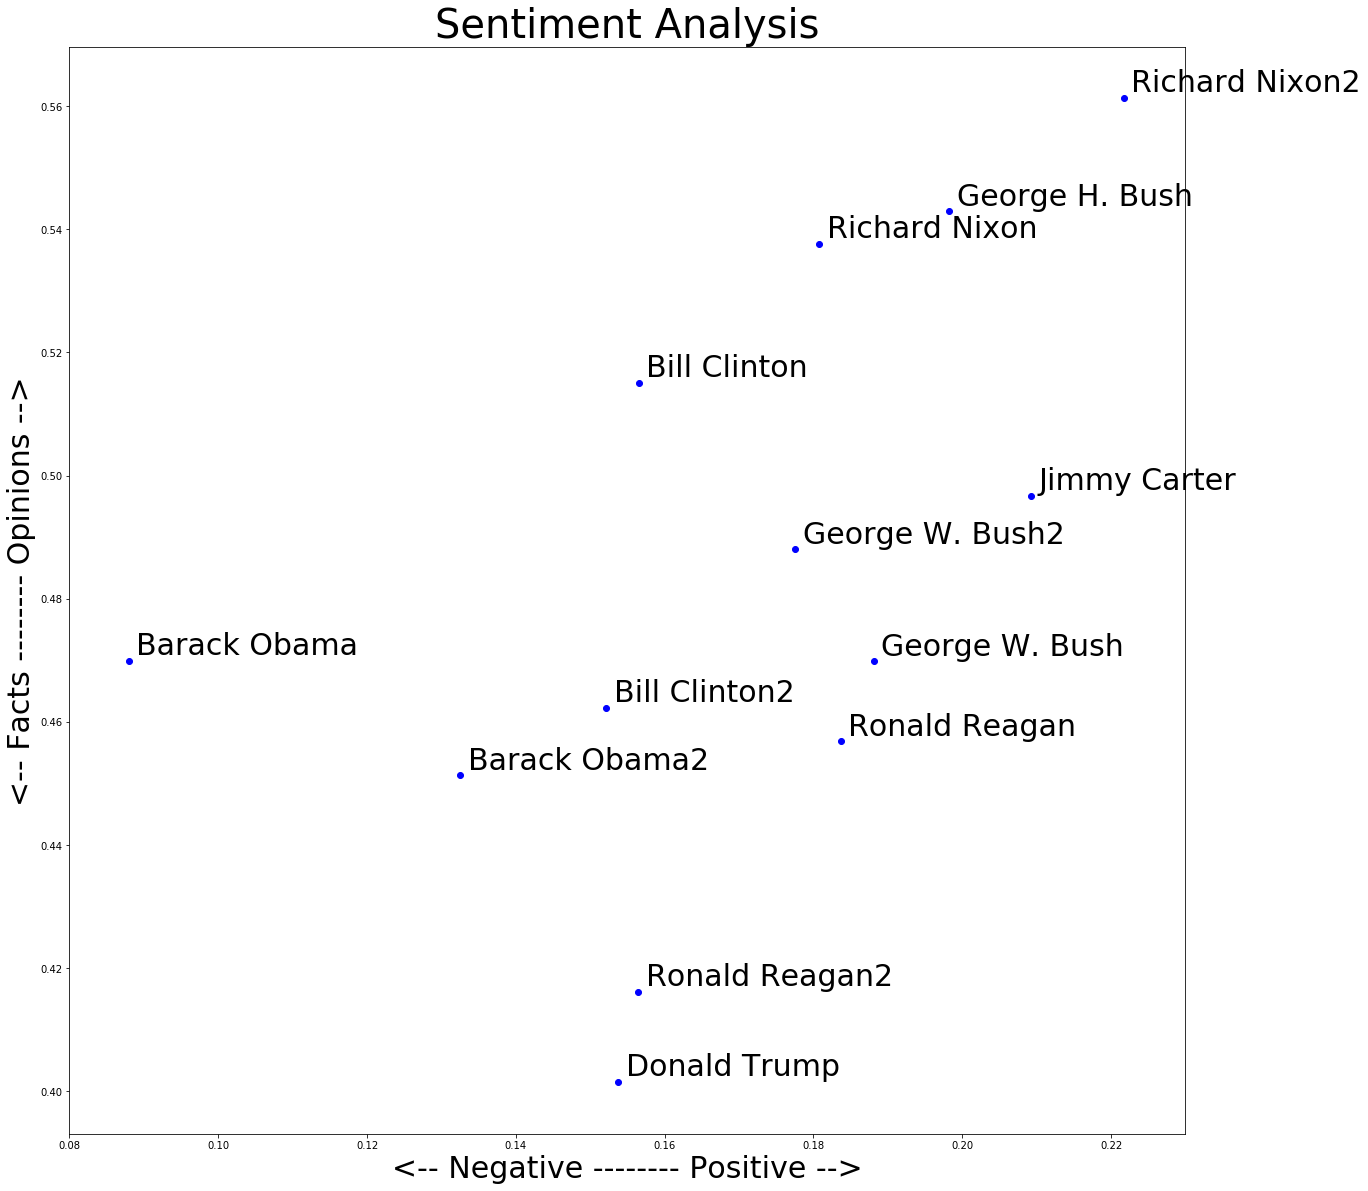

In [24]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20, 20]

for index, presidents in enumerate(data.index):
    x = data.polarity.loc[presidents]
    y = data.subjectivity.loc[presidents]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=30)
    plt.xlim(.08, .23) 
    
plt.title('Sentiment Analysis', fontsize=40)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=30)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=30)

plt.show()